In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/geekathon-data/GFG-Hackathon-main/medals.csv')
df['year'] = df['slug_game'].apply(lambda x: int(x.split('-')[-1]))

In [3]:
missing_values = df.isnull().sum()
missing_values

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
year                         0
dtype: int64

In [4]:
most_frequent_values = df.mode().iloc[0]
most_frequent_values

discipline_title                                                 Athletics
slug_game                                                       tokyo-2020
event_title                                                 Individual men
event_gender                                                           Men
medal_type                                                          BRONZE
participant_type                                                   Athlete
participant_title                                       United States team
athlete_url              https://olympics.com/en/athletes/michael-phelp...
athlete_full_name                                           Michael PHELPS
country_name                                      United States of America
country_code                                                            US
country_3_letter_code                                                  USA
year                                                                  2020
Name: 0, dtype: object

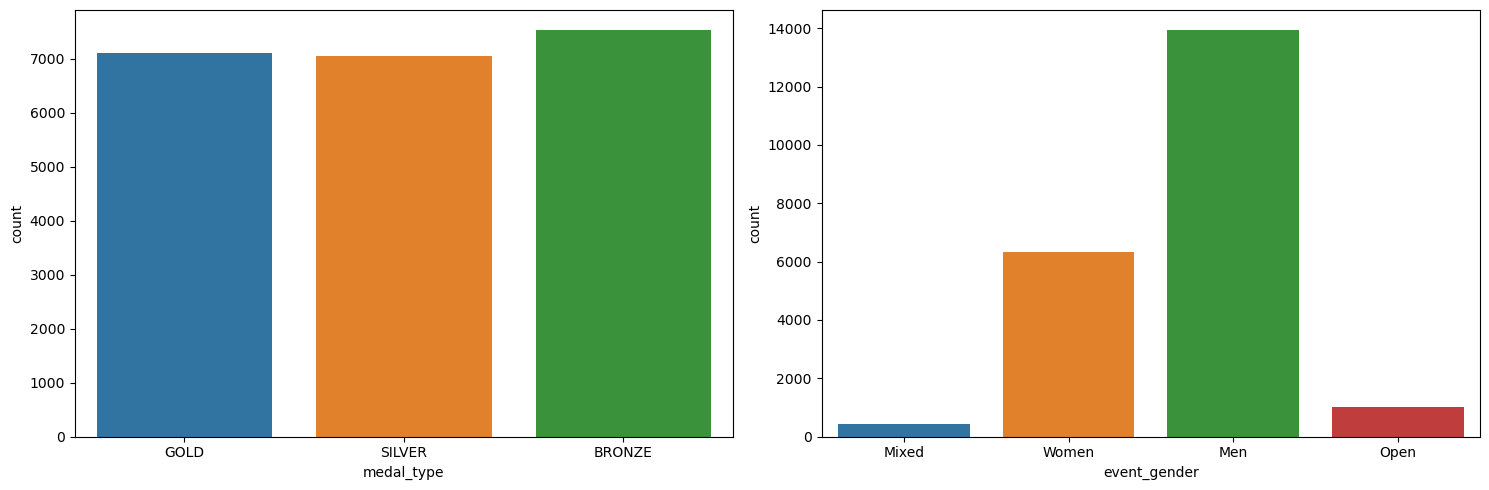

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x='medal_type', ax=ax[0])
sns.countplot(data=df, x='event_gender', ax=ax[1])
plt.tight_layout()
plt.show()

In [8]:
medals_by_country = df['country_name'].value_counts().reset_index()
medals_by_country.columns = ['Country', 'Medals']

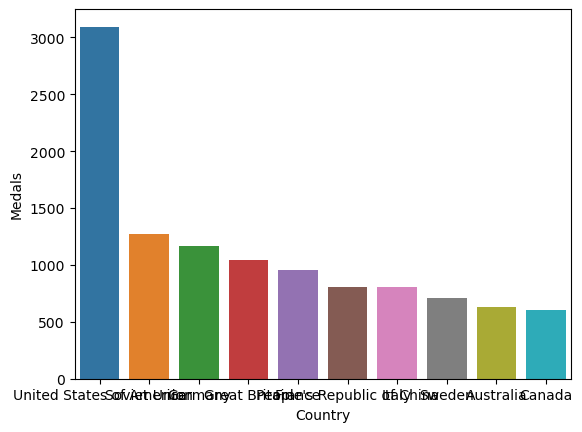

In [9]:
top_countries = medals_by_country.head(10)
sns.barplot(x='Country', y='Medals', data=top_countries)
plt.show()

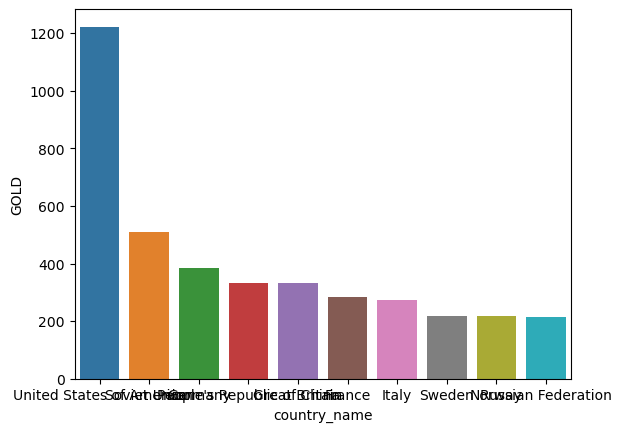

In [10]:

medals_by_type_and_country = df.groupby(['country_name', 'medal_type']).size().unstack(fill_value=0).reset_index()


top_countries_gold = medals_by_type_and_country.sort_values(by='GOLD', ascending=False).head(10)
sns.barplot(x='country_name', y='GOLD', data=top_countries_gold)
plt.show()

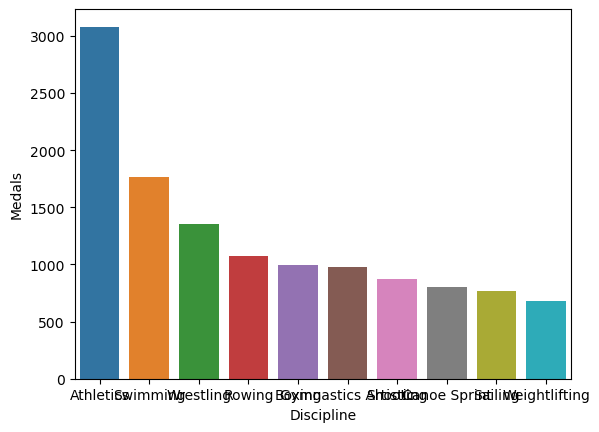

In [12]:

medals_by_discipline = df['discipline_title'].value_counts().reset_index()
medals_by_discipline.columns = ['Discipline', 'Medals']


top_disciplines = medals_by_discipline.head(10)
sns.barplot(x='Discipline', y='Medals', data=top_disciplines)
plt.show()


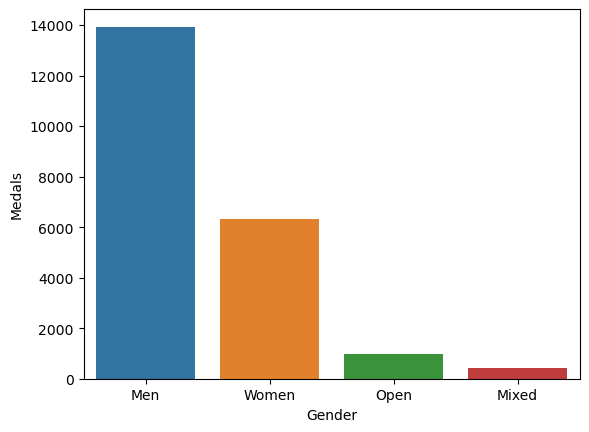

In [13]:
medals_by_gender = df['event_gender'].value_counts().reset_index()
medals_by_gender.columns = ['Gender', 'Medals']
sns.barplot(x='Gender', y='Medals', data=medals_by_gender)
plt.show()

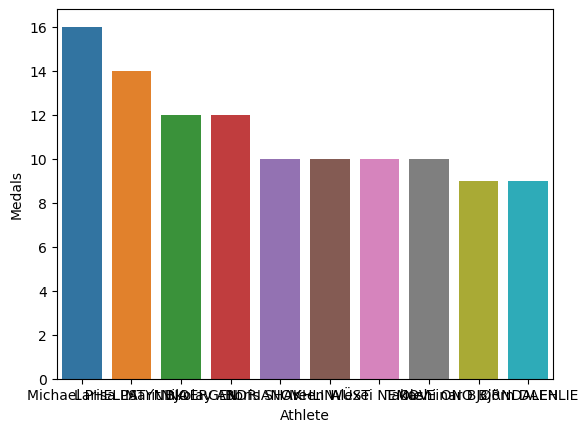

In [14]:
top_athletes = df['athlete_full_name'].value_counts().head(10).reset_index()
top_athletes.columns = ['Athlete', 'Medals']
sns.barplot(x='Athlete', y='Medals', data=top_athletes)
plt.show()

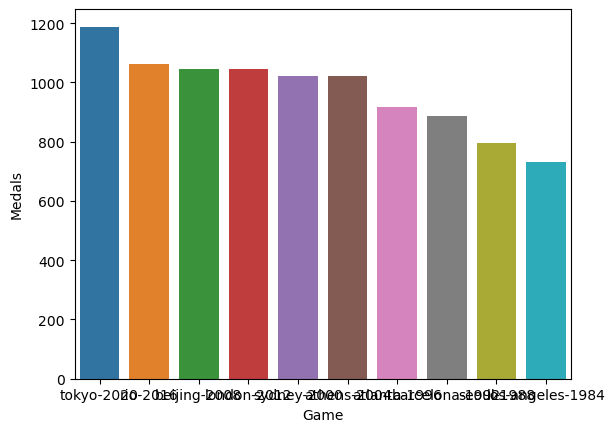

In [15]:
top_games = df['slug_game'].value_counts().head(10).reset_index()
top_games.columns = ['Game', 'Medals']
sns.barplot(x='Game', y='Medals', data=top_games)
plt.show()

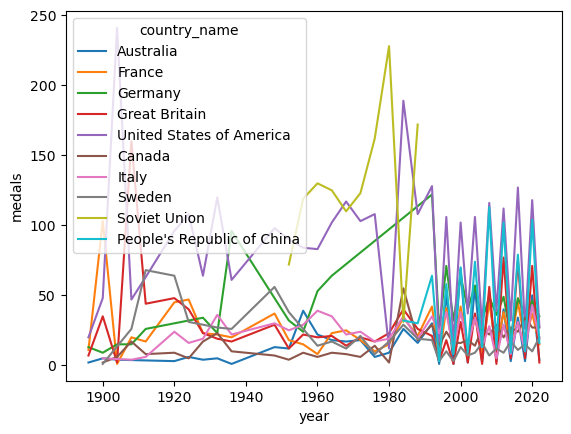

In [16]:
medals_by_country_and_year = df.groupby(['year', 'country_name']).size().reset_index(name='medals')
top_medals_by_country_and_year = medals_by_country_and_year[medals_by_country_and_year['country_name'].isin(top_countries['Country'])]
sns.lineplot(x='year', y='medals', hue='country_name', data=top_medals_by_country_and_year)
plt.show()

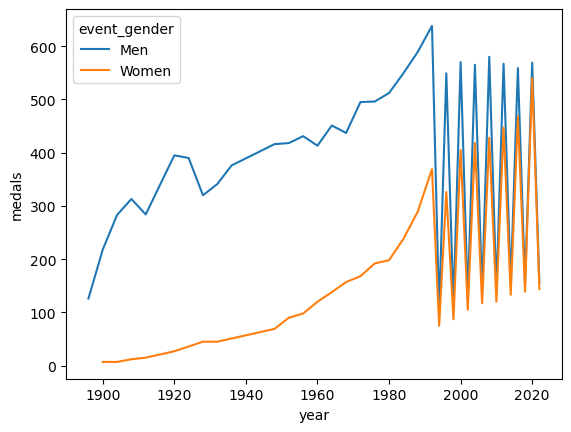

In [17]:
df_gender = df[df['event_gender'].isin(['Men', 'Women'])]
medals_by_gender_and_year = df_gender.groupby(['year', 'event_gender']).size().reset_index(name='medals')
sns.lineplot(x='year', y='medals', hue='event_gender', data=medals_by_gender_and_year)
plt.show()

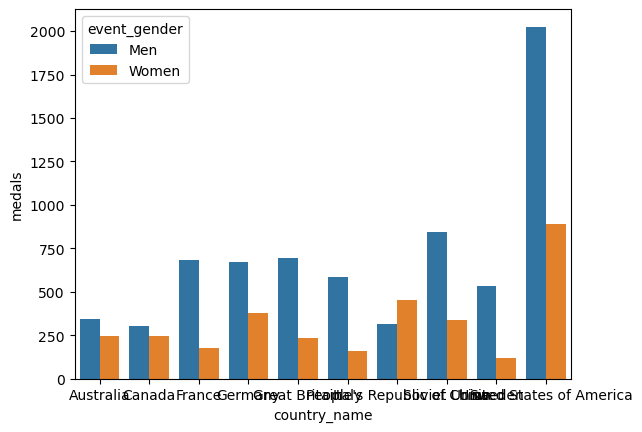

In [18]:
medals_by_country_and_gender = df_gender.groupby(['country_name', 'event_gender']).size().reset_index(name='medals')
top_medals_by_country_and_gender = medals_by_country_and_gender[medals_by_country_and_gender['country_name'].isin(top_countries['Country'])]
sns.barplot(x='country_name', y='medals', hue='event_gender', data=top_medals_by_country_and_gender)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


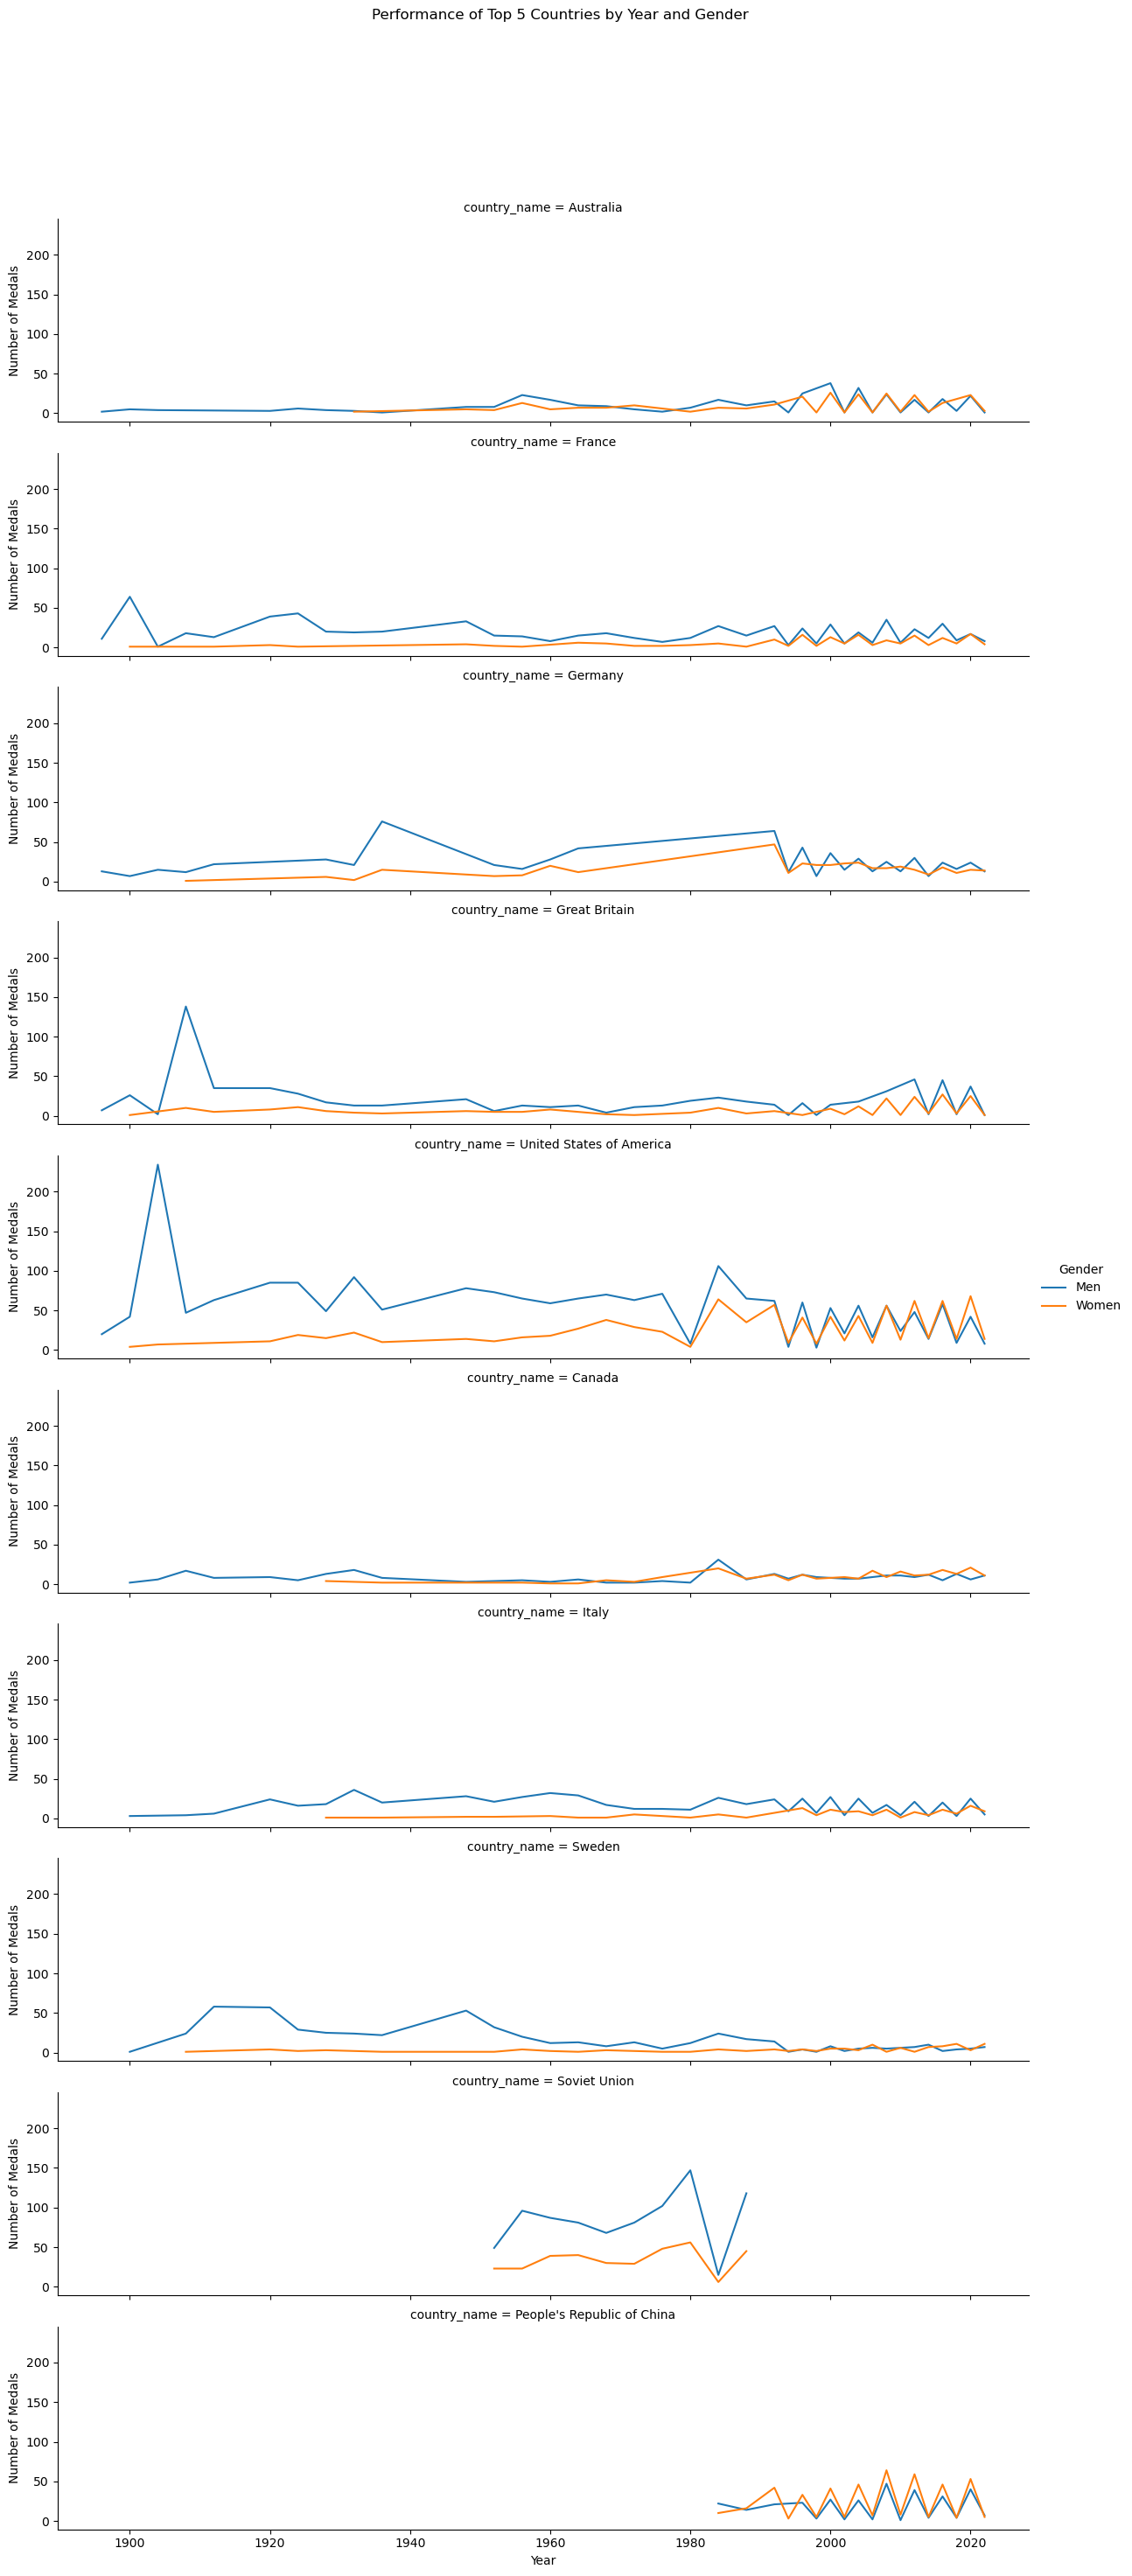

In [19]:
# Performance of top 5 countries by year and gender
medals_by_year_country_gender = df_gender.groupby(['year', 'country_name', 'event_gender']).size().reset_index(name='medals')
top_medals_by_year_country_gender = medals_by_year_country_gender[medals_by_year_country_gender['country_name'].isin(top_countries['Country'])]
g = sns.FacetGrid(top_medals_by_year_country_gender, row='country_name', hue='event_gender', height=3, aspect=4)
g.map(sns.lineplot, 'year', 'medals')
g.add_legend(title='Gender')
g.set_axis_labels('Year', 'Number of Medals')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance of Top 5 Countries by Year and Gender')
plt.show()

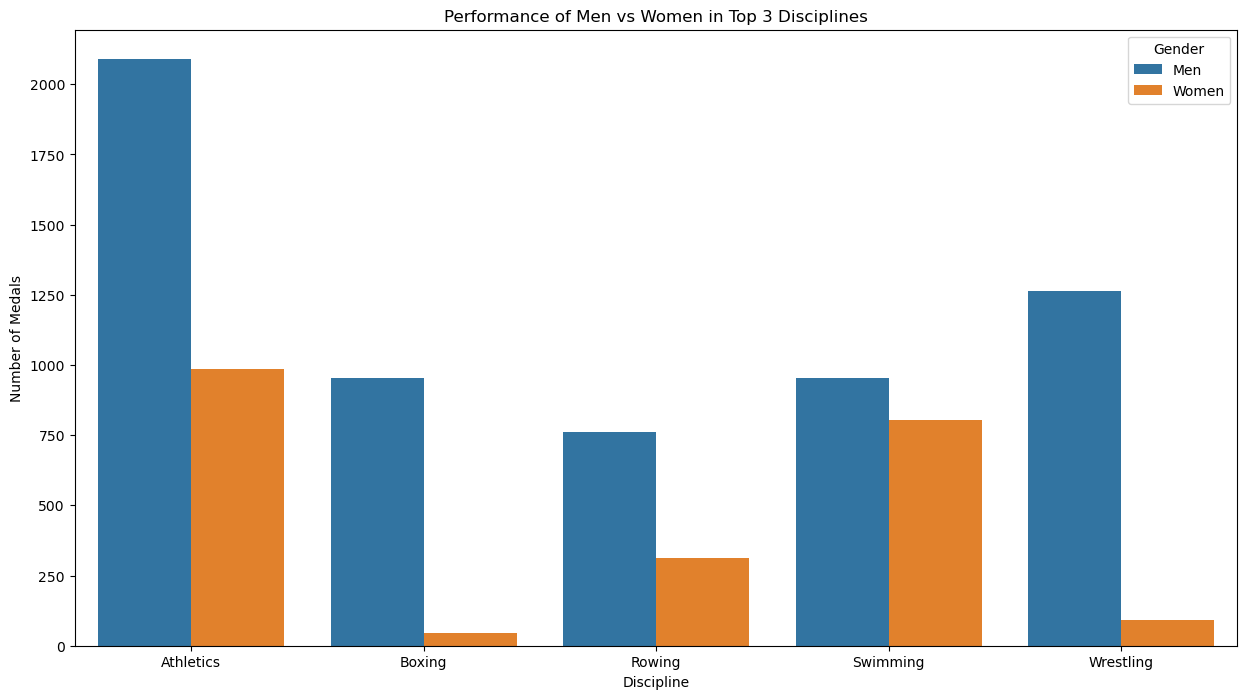

In [26]:
top_disciplines = medals_by_discipline['Discipline'].head(5)
df_top_disciplines = df_gender[df_gender['discipline_title'].isin(top_disciplines)]
medals_by_discipline_gender = df_top_disciplines.groupby(['discipline_title', 'event_gender']).size().reset_index(name='medals')

plt.figure(figsize=(15, 8))
sns.barplot(x='discipline_title', y='medals', hue='event_gender', data=medals_by_discipline_gender)
plt.title('Performance of Men vs Women in Top 3 Disciplines')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.show()

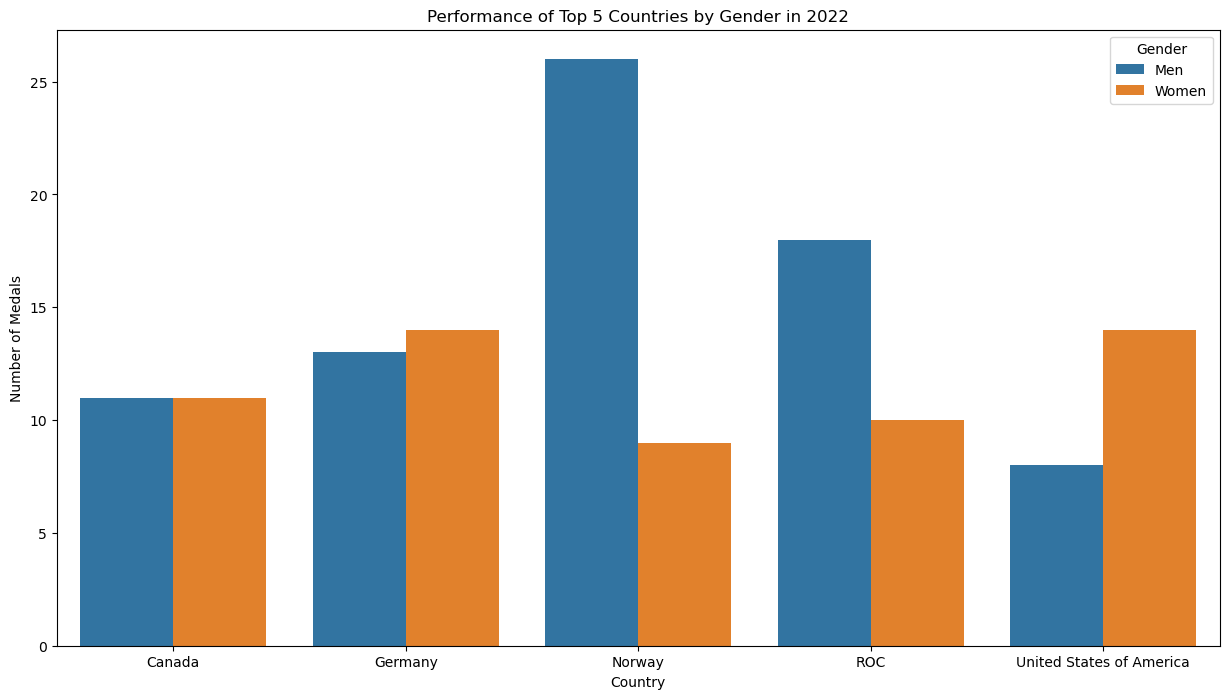

In [21]:
# Performance of top 5 countries by gender in the last Olympic year
last_year = df['year'].max()
df_last_year = df_gender[df_gender['year'] == last_year]
medals_by_country_gender_last_year = df_last_year.groupby(['country_name', 'event_gender']).size().reset_index(name='medals')
top_countries_last_year = medals_by_country_gender_last_year.groupby('country_name')['medals'].sum().nlargest(5).index
top_medals_by_country_gender_last_year = medals_by_country_gender_last_year[medals_by_country_gender_last_year['country_name'].isin(top_countries_last_year)]

plt.figure(figsize=(15, 8))
sns.barplot(x='country_name', y='medals', hue='event_gender', data=top_medals_by_country_gender_last_year)
plt.title(f'Performance of Top 5 Countries by Gender in {last_year}')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


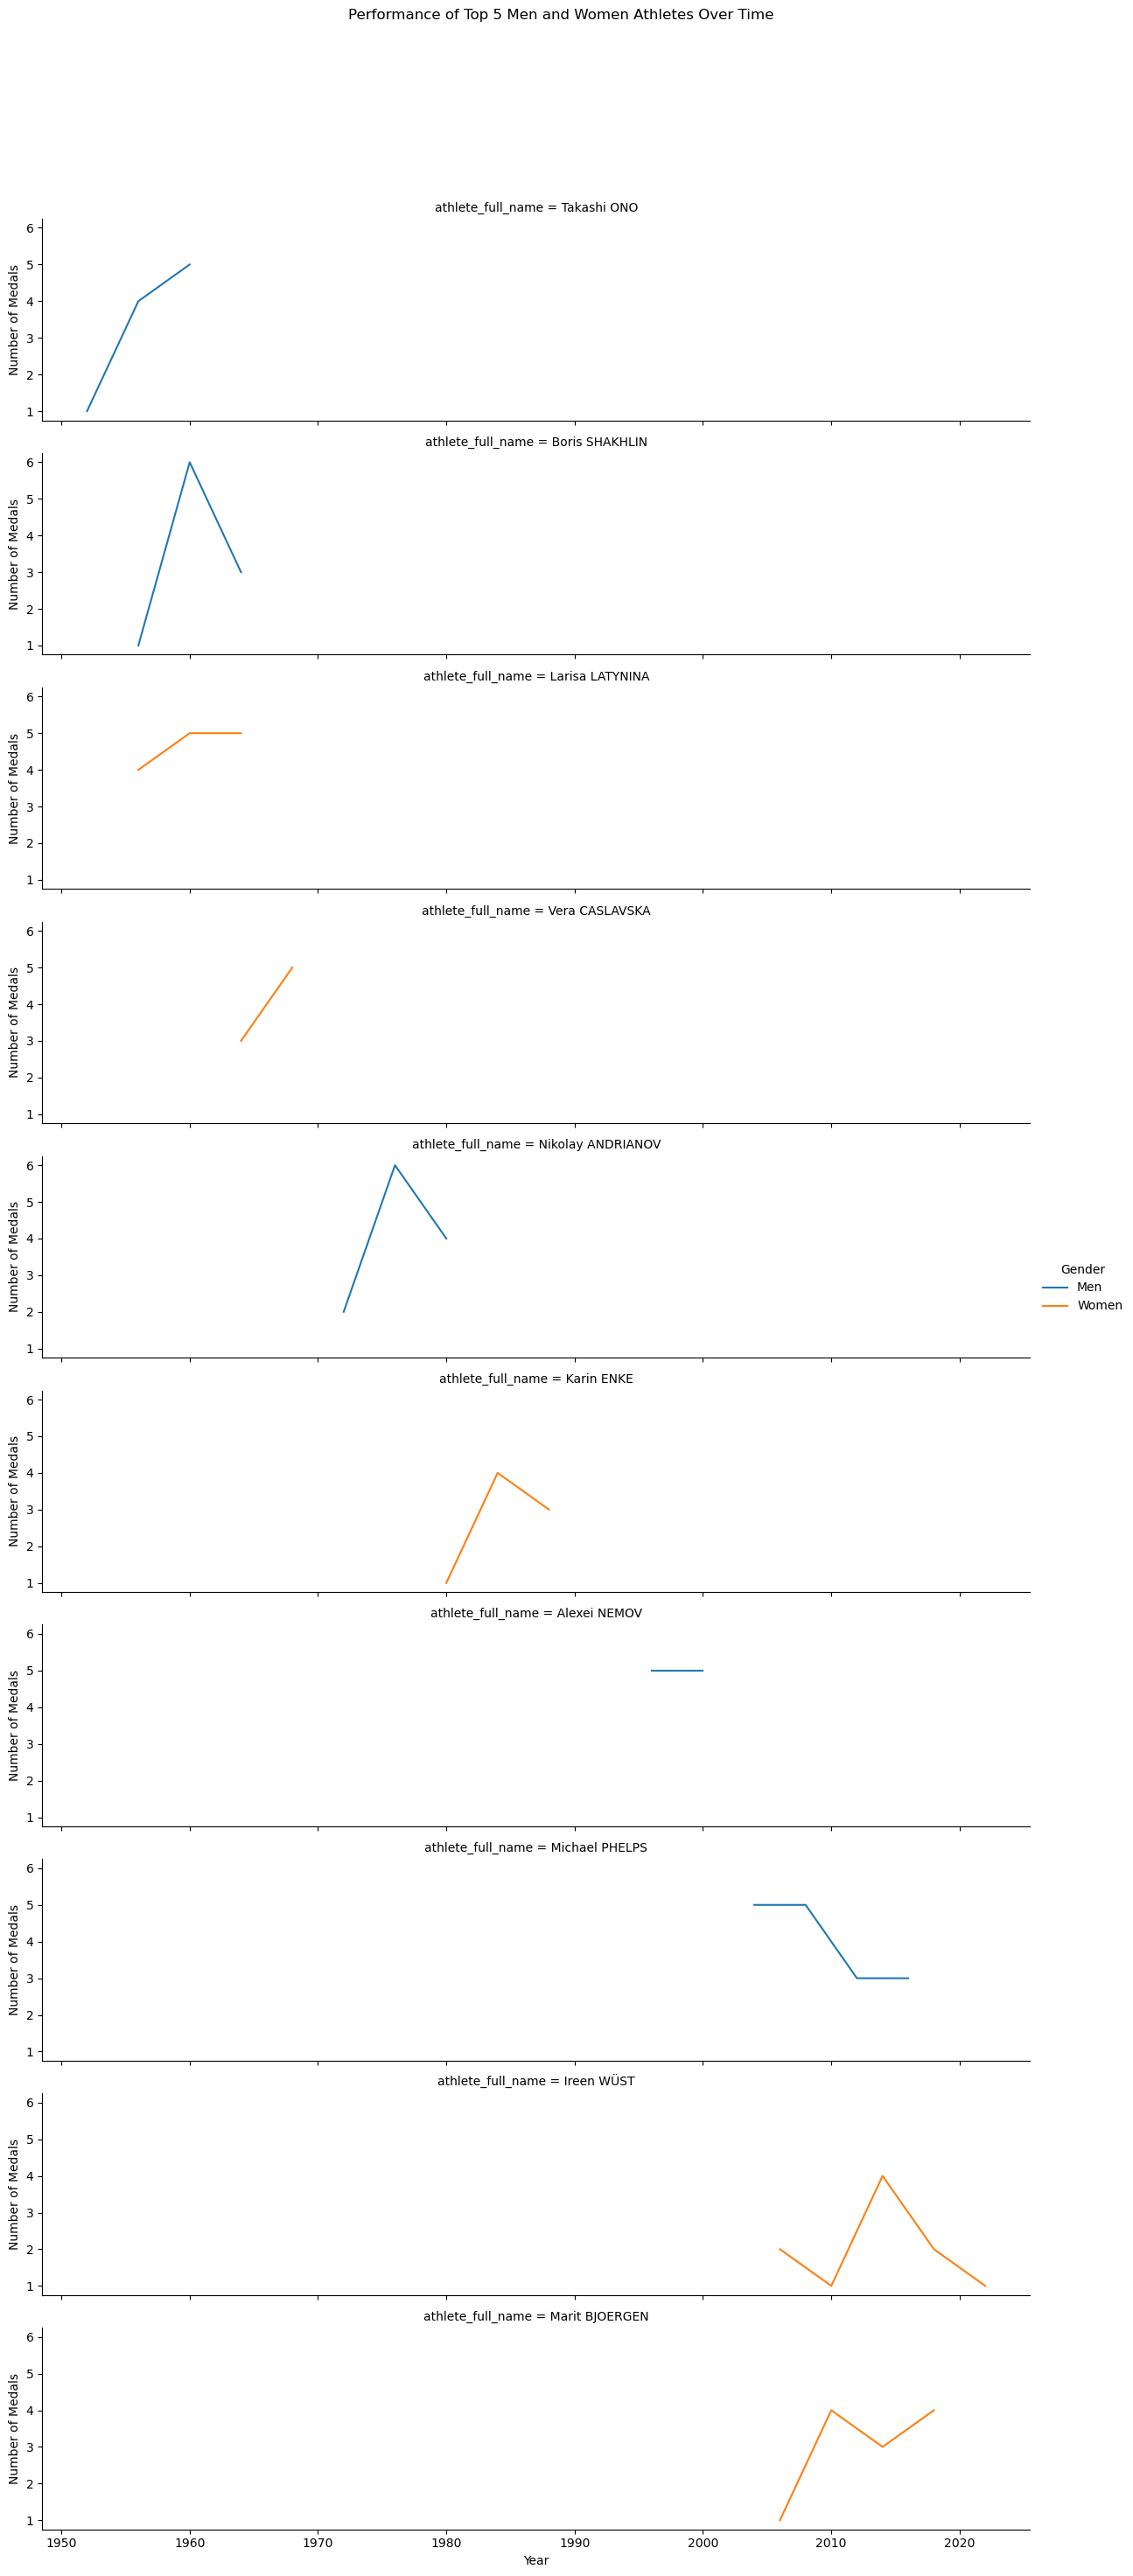

In [22]:
top_men_athletes = df[df['event_gender'] == 'Men']['athlete_full_name'].value_counts().head(5).index
top_women_athletes = df[df['event_gender'] == 'Women']['athlete_full_name'].value_counts().head(5).index
df_top_athletes = df[df['athlete_full_name'].isin(top_men_athletes.union(top_women_athletes))]
medals_by_year_athlete_gender = df_top_athletes.groupby(['year', 'athlete_full_name', 'event_gender']).size().reset_index(name='medals')

g = sns.FacetGrid(medals_by_year_athlete_gender, row='athlete_full_name', hue='event_gender', height=3, aspect=4)
g.map(sns.lineplot, 'year', 'medals')
g.add_legend(title='Gender')
g.set_axis_labels('Year', 'Number of Medals')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance of Top 5 Men and Women Athletes Over Time')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


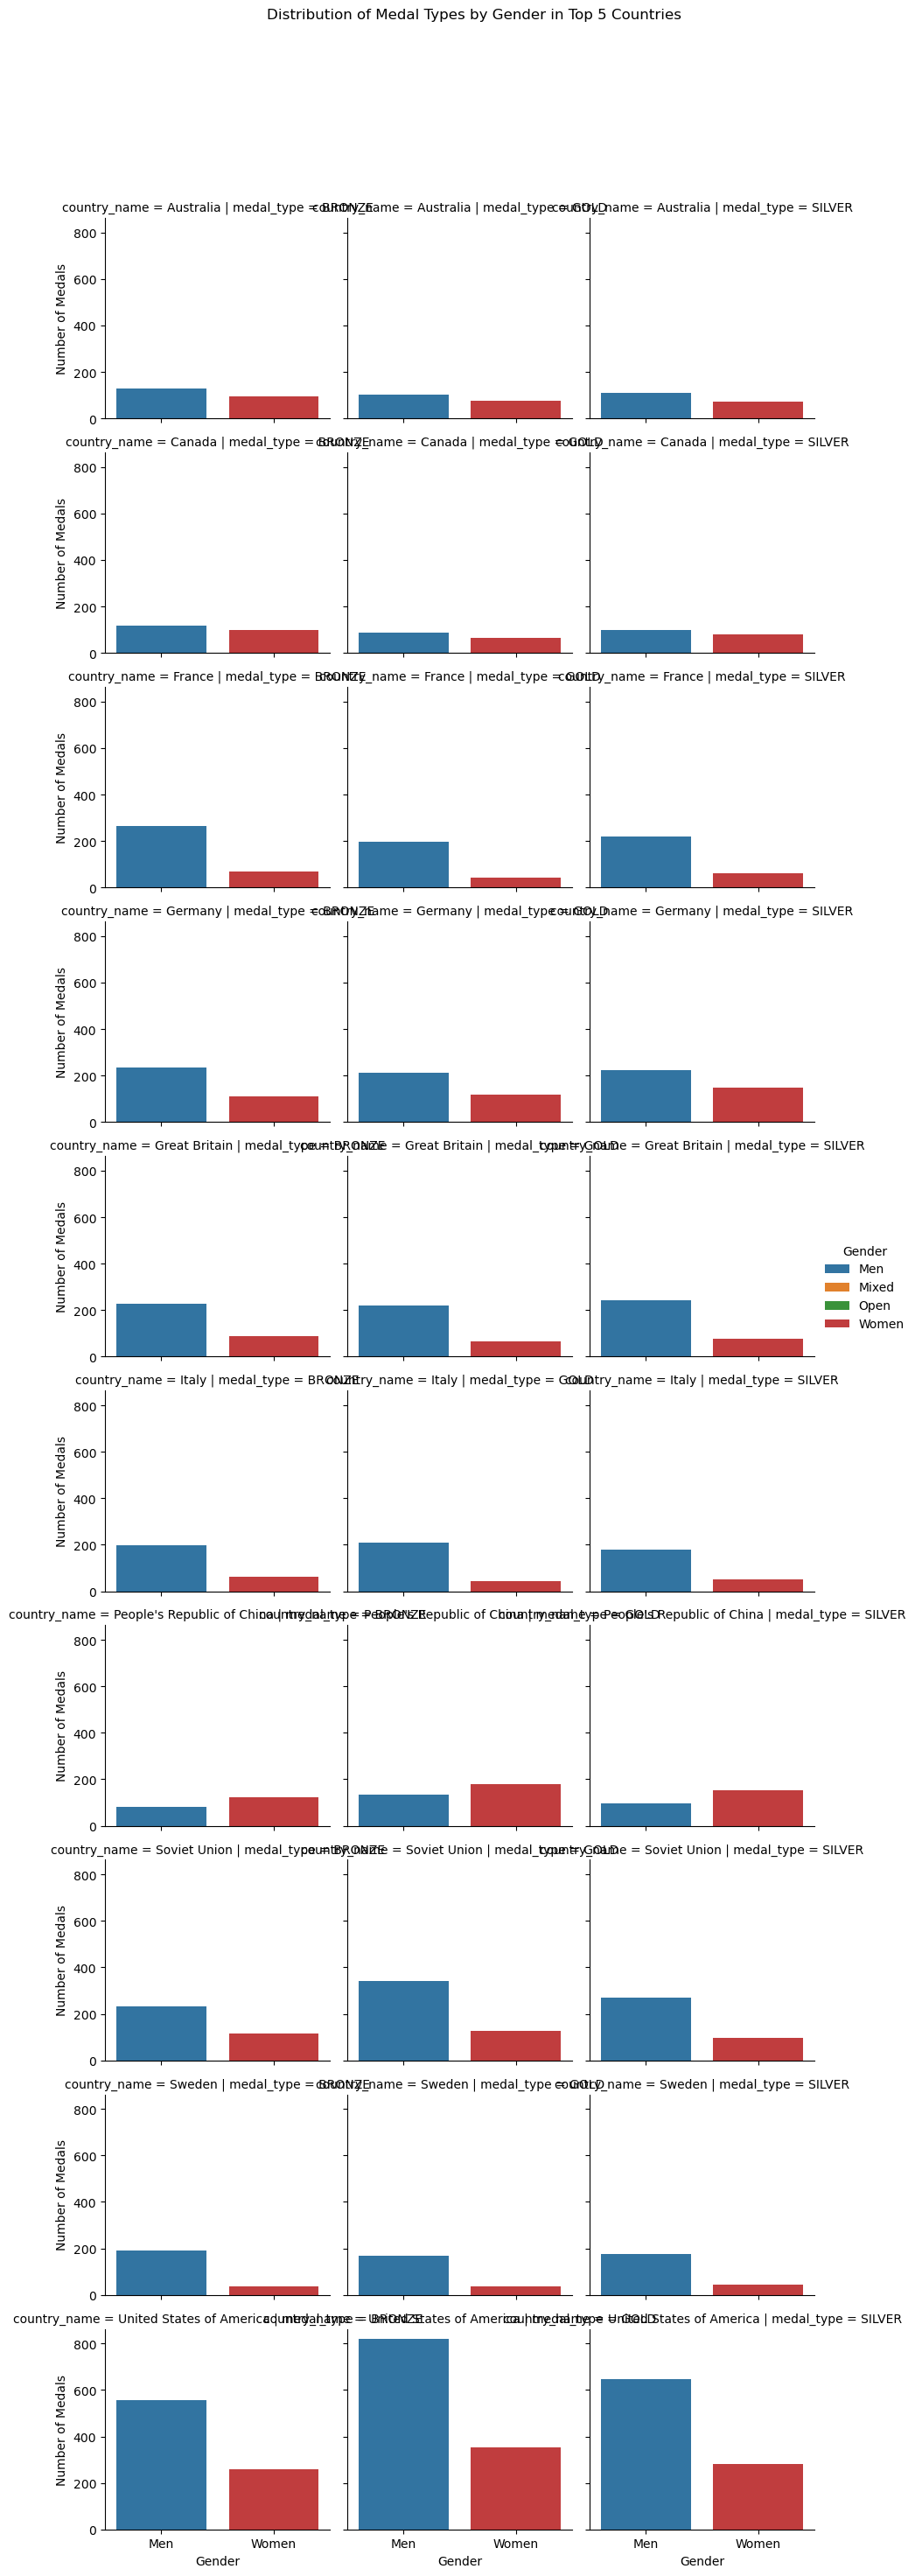

In [23]:
medals_by_type_country_gender = df.groupby(['medal_type', 'country_name', 'event_gender']).size().reset_index(name='medals')
top_medals_by_type_country_gender = medals_by_type_country_gender[medals_by_type_country_gender['country_name'].isin(top_countries['Country'])]

g = sns.FacetGrid(top_medals_by_type_country_gender, row='country_name', col='medal_type', hue='event_gender', height=3, aspect=1)
g.map(sns.barplot, 'event_gender', 'medals', order=['Men', 'Women'])
g.add_legend(title='Gender')
g.set_axis_labels('Gender', 'Number of Medals')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Medal Types by Gender in Top 5 Countries')
plt.show()

In [24]:
medals_difference = df_gender.groupby(['discipline_title', 'event_gender'])['medal_type'].count().unstack()
medals_difference['difference'] = medals_difference['Men'] - medals_difference['Women']
disciplines_men_won_more = medals_difference[medals_difference['difference'] > 0].index
df_disciplines_men_won_more = df_gender[df_gender['discipline_title'].isin(disciplines_men_won_more)]
medals_by_discipline_gender = df_disciplines_men_won_more.groupby(['discipline_title', 'event_gender']).size().reset_index(name='medals')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


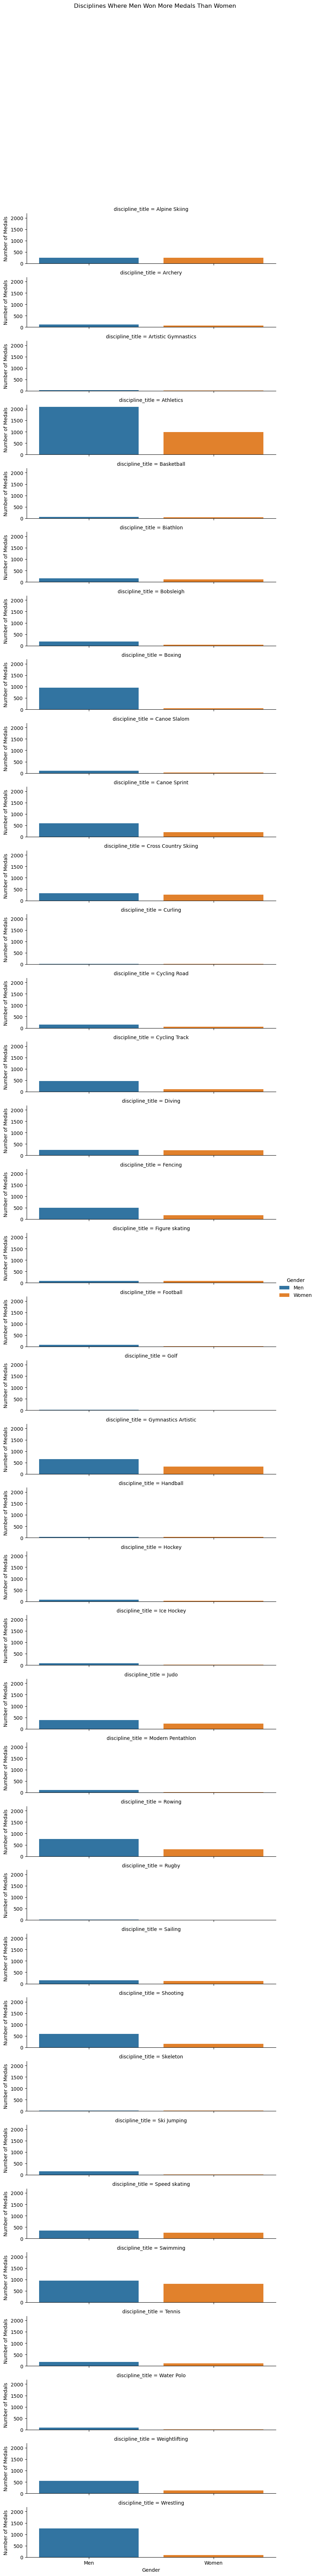

In [25]:
g = sns.FacetGrid(medals_by_discipline_gender, row='discipline_title', hue='event_gender', height=2, aspect=4, row_order=disciplines_men_won_more)
g.map(sns.barplot, 'event_gender', 'medals', order=['Men', 'Women'])
g.add_legend(title='Gender')
g.set_axis_labels('Gender', 'Number of Medals')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disciplines Where Men Won More Medals Than Women')
plt.show()